<a href="https://colab.research.google.com/github/jpandersen61/Machine-Learning/blob/main/Over_fitting_and_Under_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Over-fitting & Under-fitting

###Introduction

In this exercise you will have the opportunity to explore under an overfit conditions
with 3 different modets:
1. Our well known linear model. Learning data will be arrange so that this model **underfits**. That a
relatively bad performance on both the training and the test. This also called **high bias**.
2. A polynomial model of degree 2. Learning data will be arranged, so that this model is the most well-
fitted **bold text** of our models. Such a model will perform equally well on both the learning set and the test set.
3. And a model with a degree higher than 2. Learning data will be arranged so that this model **overfits**.
That is a good may be perfect performance on the training set and a significant worser performance on
the test set. This is also referred to as **high variance**.
In many cases in machine learning, we have to find best trade-off between bias and variance to find the
solution with the best performance – e.g. measured in terms of RMSE. We are going to explore this now.

# Setup

This project requires Python 3.7 or above:

In [18]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [19]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [20]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [21]:
import numpy as np

In [22]:
from sklearn.linear_model import LinearRegression

# Polynomial Regression

#Exercise(s)

Test with different models and observe diffrences:


1.   Linear: $\mathbf{y=X+2}$
2.   Polynomial: $\mathbf{y=0.5X}^2\mathbf{+X+2}$
3.   Proceed with Polynomial





In [23]:
#Polynomial
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [24]:
#Linear
#np.random.seed(42)
#m = 100
#X = 6 * np.random.rand(m, 1) - 3
#y =  X + 2 + np.random.randn(m, 1)

In [25]:
#Polynomial
np.random.seed(43)
m_test = 25
X_test = 6 * np.random.rand(m_test, 1) - 3
y_test = 0.5 * X_test ** 2 + X_test + 2 + np.random.randn(m_test, 1)


In [26]:
#Linear
#np.random.seed(43)
#m_test = 25
#X_test = 6 * np.random.rand(m_test, 1) - 3
#y_test = X_test + 2 + np.random.randn(m_test, 1)


###Plotting learning & test set

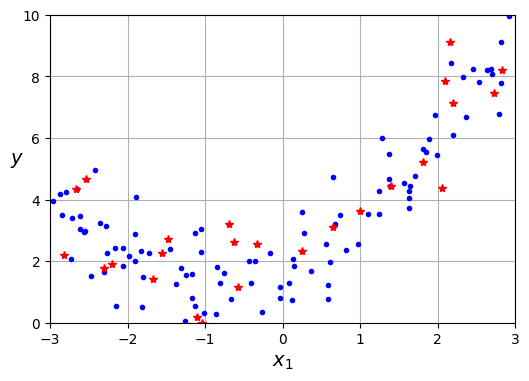

In [27]:

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_test, y_test, "r*") #Part 3
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

###Fitting the model 2nd degree model

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


LinearRegression()

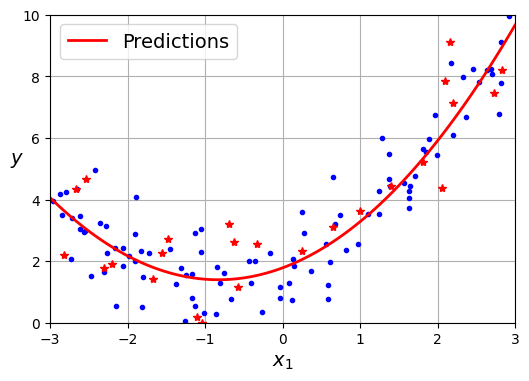

In [30]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_test, y_test, "r*") #Part 3
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

###Comparing with other models

###Exercise(s)

1.   Analyse code below
2.   What about under-and-overfitting?



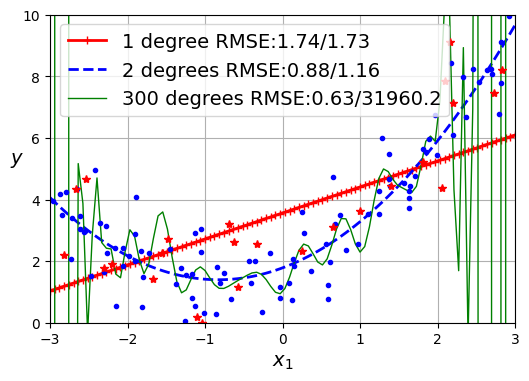

In [31]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error #Part 4
import math #Part 4

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)

    #Part 4 starts here
    y_predicted = polynomial_regression.predict(X)
    RMSE = math.sqrt(mean_squared_error(y_predicted,y))
    y_test_predicted = polynomial_regression.predict(X_test)
    RMSE_test =  math.sqrt(mean_squared_error(y_test_predicted, y_test))
    #Part 4 ends here


    y_newbig = polynomial_regression.predict(X_new)

    label = f"{degree} degree{'s' if degree > 1 else ''} RMSE:{round(RMSE,2)}/{round(RMSE_test,2)}" #Part 4 add RMSE values

    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.plot(X_test, y_test, "r*") #Part 3
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

# Learning Curves

###Excercise(s)


1.   Make the learning curved for the 2nd degree model as well
2.   Observations?



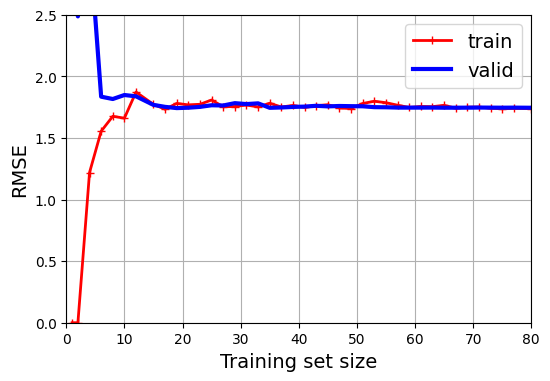

In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

In [33]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

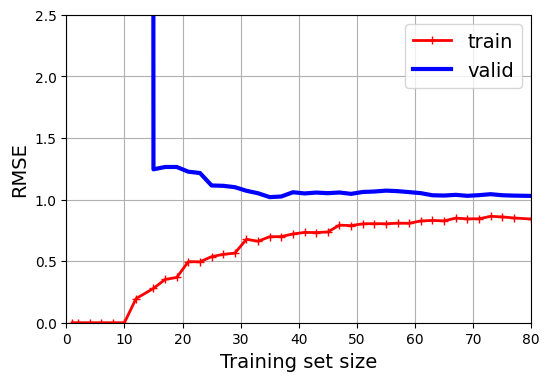

In [34]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()